In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam
import matplotlib.pyplot as plt

In [ ]:
#load dataset

cifar10 = tf.keras.datasets.cifar10
(x_train_cifar10, y_train_cifar10), (x_test_cifar10, y_test_cifar10) = cifar10.load_data()


170498071/170498071 [==============================] - 10s 0us/step


In [ ]:
# Function to create and compile CNN model with specified optimizer, learning rate, and momentum
def create_cnn(optimizer,learning_rate, momentum):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Function to train and evaluate the model
def train_and_evaluate(model, x_train, y_train, x_test, y_test, epochs=10):
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))
    return history

In [ ]:
# optimizer = SGD(learning_rate=learning_rate, momentum=momentum)

In [ ]:
# Function to plot training and validation metrics
def plot_metrics(history, title):
    plt.figure(figsize=(12, 8))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Metric Value')
    plt.legend()
    plt.show()

Training for SGD with learning_rate = 0.001 and momentum = 0.0
Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 2.1285 - accuracy: 0.2827 - val_loss: 1.8147 - val_accuracy: 0.3446
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6563 - accuracy: 0.4033 - val_loss: 1.5749 - val_accuracy: 0.4338
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5333 - accuracy: 0.4498 - val_loss: 1.5115 - val_accuracy: 0.4616
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4535 - accuracy: 0.4813 - val_loss: 1.4259 - val_accuracy: 0.4874
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3893 - accuracy: 0.5056 - val_loss: 1.4265 - val_accuracy: 0.4873
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3397 - accuracy: 0.5247 - val_loss: 1.3441 - val_accuracy: 0.5221
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - lo

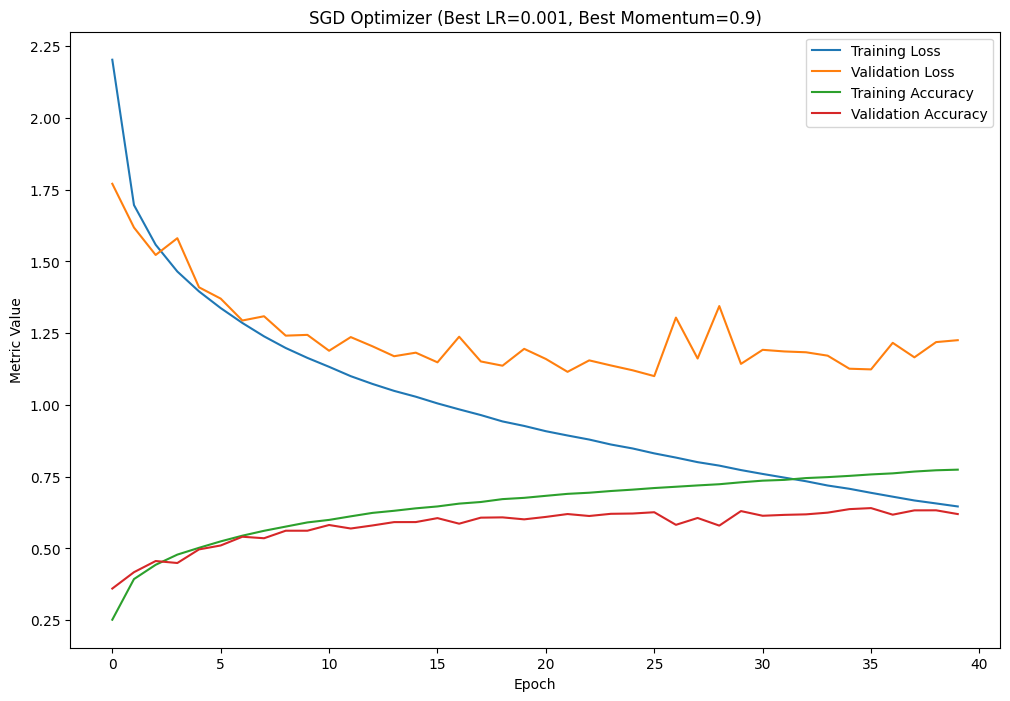

In [ ]:
# Hyperparameter tuning for SGD optimizer
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.0, 0.2, 0.5, 0.9]
optimizer = SGD

best_accuracy = 0.0
best_lr = None
best_momentum = None

for lr in learning_rates:
    for momentum in momentums:
        model_sgd = create_cnn(optimizer=optimizer,learning_rate=lr, momentum=momentum)
        print(f"Training for SGD with learning_rate = {lr} and momentum = {momentum}")
        history_sgd = train_and_evaluate(model_sgd, x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10, epochs=10)
        accuracy = history_sgd.history['val_accuracy'][-1]

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr
            best_momentum = momentum

# Plot the best model
model_sgd_best = create_cnn(optimizer=SGD,learning_rate=best_lr, momentum=best_momentum)
history_sgd_best = train_and_evaluate(model_sgd_best, x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10, epochs=40)
plot_metrics(history_sgd_best, f'SGD Optimizer (Best LR={best_lr}, Best Momentum={best_momentum})')

Training for <class 'keras.src.optimizers.rmsprop.RMSprop'> with learning_rate = 0.001 and momentum = 0.0
Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8608 - accuracy: 0.3765 - val_loss: 1.4450 - val_accuracy: 0.4808
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3673 - accuracy: 0.5287 - val_loss: 1.2864 - val_accuracy: 0.5549
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2709 - accuracy: 0.5705 - val_loss: 1.2821 - val_accuracy: 0.5625
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2055 - accuracy: 0.5978 - val_loss: 1.4241 - val_accuracy: 0.5488
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1514 - accuracy: 0.6165 - val_loss: 1.5264 - val_accuracy: 0.5471
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1157 - accuracy: 0.6297 - val_loss: 1.1852 - val_accuracy: 0.6102
Epoch 7/10
1563/1563 [========

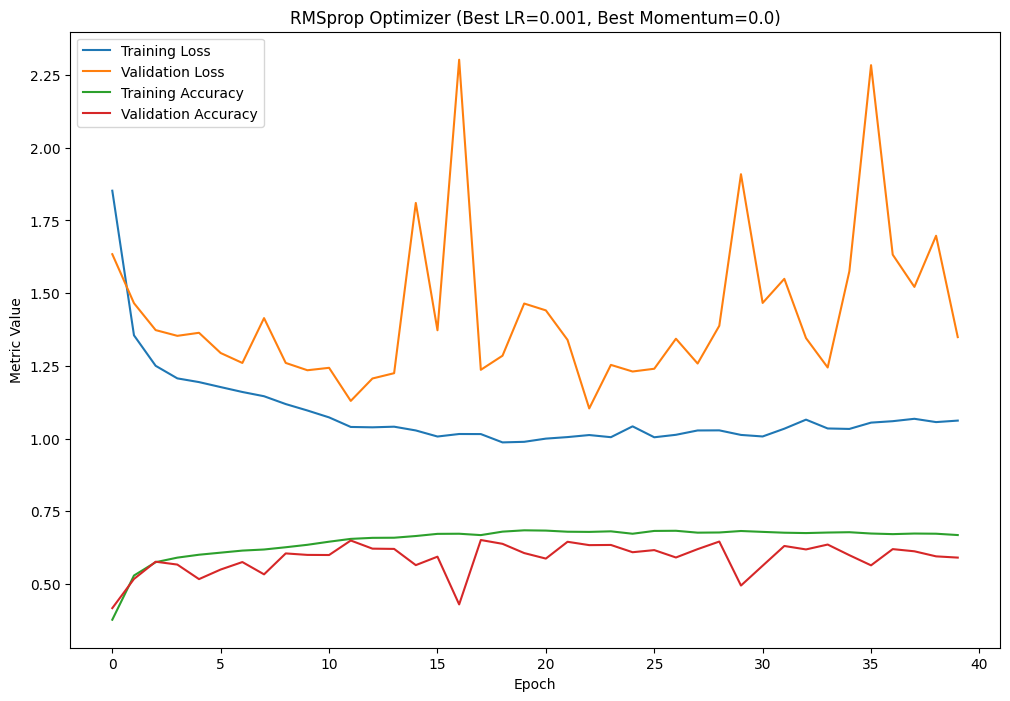

Training for <class 'keras.src.optimizers.adagrad.Adagrad'> with learning_rate = 0.001 and momentum = 0.0
Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.2057 - accuracy: 0.2666 - val_loss: 1.8728 - val_accuracy: 0.3309
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8097 - accuracy: 0.3531 - val_loss: 1.7752 - val_accuracy: 0.3682
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7100 - accuracy: 0.3858 - val_loss: 1.6776 - val_accuracy: 0.3961
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6439 - accuracy: 0.4099 - val_loss: 1.6336 - val_accuracy: 0.4174
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5950 - accuracy: 0.4269 - val_loss: 1.5820 - val_accuracy: 0.4331
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5559 - accuracy: 0.4432 - val_loss: 1.5601 - val_accuracy: 0.4437
Epoch 7/10
1563/1563 [=======

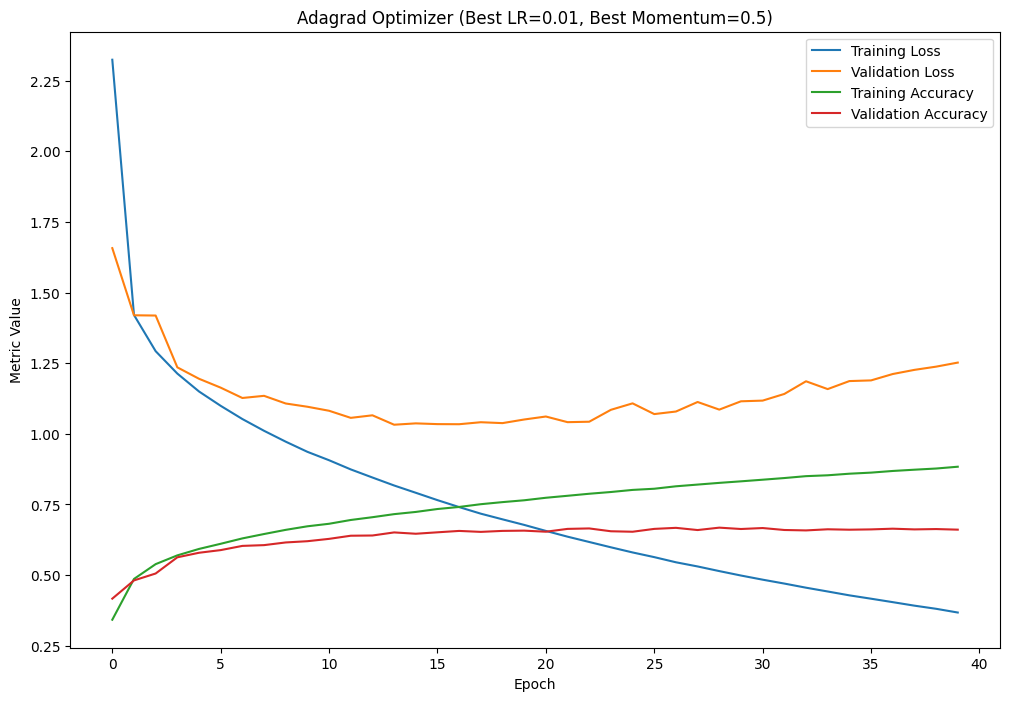

Training for <class 'keras.src.optimizers.adam.Adam'> with learning_rate = 0.001 and momentum = 0.0
Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.9107 - accuracy: 0.3433 - val_loss: 1.5318 - val_accuracy: 0.4440
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3894 - accuracy: 0.5024 - val_loss: 1.2838 - val_accuracy: 0.5440
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2171 - accuracy: 0.5664 - val_loss: 1.1899 - val_accuracy: 0.5829
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1112 - accuracy: 0.6090 - val_loss: 1.1275 - val_accuracy: 0.6058
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0311 - accuracy: 0.6407 - val_loss: 1.1235 - val_accuracy: 0.6157
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9610 - accuracy: 0.6651 - val_loss: 1.0842 - val_accuracy: 0.6330
Epoch 7/10
1563/1563 [=============

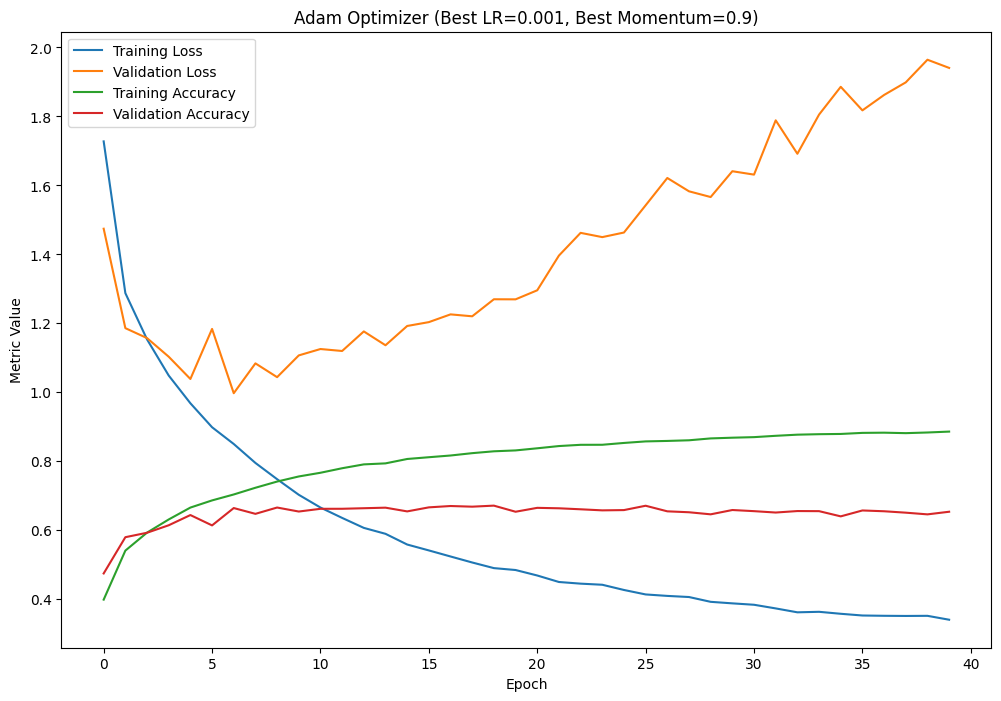

In [ ]:
# Hyperparameter tuning for RMSprop, Adagrad, and Adam optimizers
optimizers = [RMSprop, Adagrad, Adam]

for optimizer in optimizers:
    best_accuracy_optimizer = 0.0
    best_lr_optimizer = None
    best_momentum_optimizer = None

    for lr in learning_rates:
        for momentum in momentums:
            model_optimizer = create_cnn(optimizer=optimizer, learning_rate=lr, momentum=momentum)
            print(f"Training for {optimizer} with learning_rate = {lr} and momentum = {momentum}")
            history_optimizer = train_and_evaluate(model_optimizer, x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10, epochs=10)
            accuracy_optimizer = history_optimizer.history['val_accuracy'][-1]

            if accuracy_optimizer > best_accuracy_optimizer:
                best_accuracy_optimizer = accuracy_optimizer
                best_lr_optimizer = lr
                best_momentum_optimizer = momentum

    # Plot the best model for each optimizer
    model_optimizer_best = create_cnn(optimizer=optimizer, learning_rate=best_lr_optimizer, momentum=best_momentum_optimizer)
    history_optimizer_best = train_and_evaluate(model_optimizer_best, x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10, epochs=40)
    plot_metrics(history_optimizer_best, f'{optimizer.__name__} Optimizer (Best LR={best_lr_optimizer}, Best Momentum={best_momentum_optimizer})')


1. The influence of tuning different sets of parameters lies in finding the combination that leads to the best model performance. It helps identify the optimal learning rate and momentum values for the SGD optimizer, and it provides a comparison between different optimizers in terms of their ability to converge and achieve high accuracy on the CIFAR-10 dataset. This process helps in understanding how different optimization algorithms behave with respect to the chosen hyperparameters and which one performs better for the specific task at hand.